<a href="https://colab.research.google.com/github/faizanqubaz/face_recogination_project/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/data/image"

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!ls
!7za -y x "/content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.*"

drive  sample_data

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Colab Notebooks/data/image/                                                            8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/Colab Notebooks/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jp

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/processed_data"

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/processed_data’: File exists


In [ ]:
!cp -r ./origin/ "/content/drive/MyDrive/Colab Notebooks/processed_data"

In [ ]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import  PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds



In [ ]:
images_dir="/content/drive/MyDrive/Colab Notebooks/processed_data/origin"

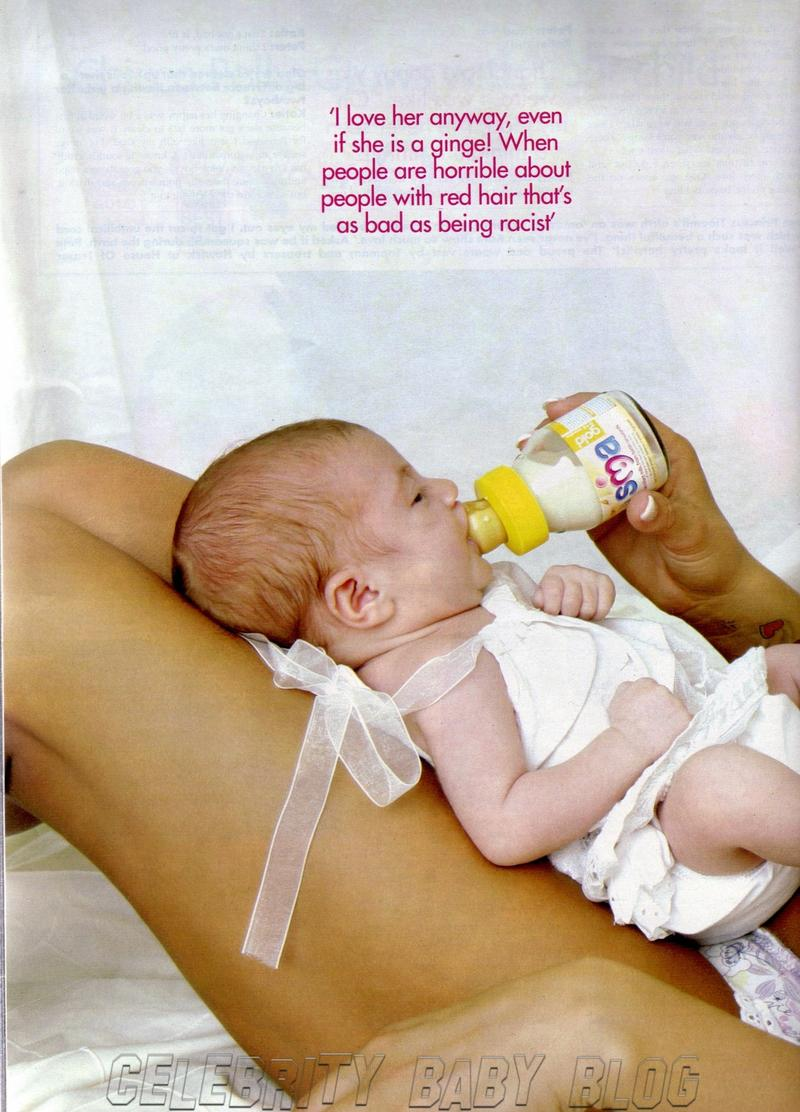

In [ ]:
images=list(glob.glob(os.path.join(images_dir,'*.jpg')))
PIL.Image.open(str(images[0]))

In [ ]:
labels_file='/content/drive/MyDrive/Colab Notebooks/data/label/label.lst'
df=pd.read_csv(labels_file,header=None,delimiter=" ",names=['image_name','face_id_in_images','face_box_left','face_box_right','face_box_bottom','face_box_confidence','expression_label'])


In [ ]:
df.head()

image_name  ...  expression_label
angry_actor_104.jpg           0  ...                 0
angry_actor_109.jpg           0  ...                 0
angry_actor_120.jpg           1  ...                 2
angry_actor_13.jpg            0  ...                 3
angry_actor_132.jpg           0  ...                 0

[5 rows x 7 columns]

In [ ]:
labels_names=["angry","disgust","fear","happy","sad","surprise","neutral"]

In [ ]:
file_paths=df['image_name']
labels=df['expression_label']
list_ds=tf.data.Dataset.list_files(os.path.join("/content/drive/MyDrive/Colab Notebooks/processed_data",'*/*'),shuffle=False)

In [ ]:
batch_size=32
img_height=180
img_width=180

In [ ]:
new_data_path="/content/drive/MyDrive/Emotions"
for lbl in labels_names:
  os.makedirs(os.path.join(new_data_path,lbl),exist_ok=True)

In [ ]:
import os
import cv2
import pandas as pd
from tqdm import tqdm
#we will create a mapper directonary that will maps labels to the folder names
#we will create a mapper directonary that will maps labels to the folder names
mapper={
    0:'angry',
    1:'disgust',
    2:'fear',
    3:'happy',
    4:'sad',
    5:'surprise',
    6:'neutral'
}
origin_folder_path='/content/drive/MyDrive/Colab Notebooks/processed_data'
final_data_path='/content/drive/MyDrive/Emotions'


for label in tqdm(df.expression_label.unique()):
  new_df=df[df.expression_label==label]
  folder_name=mapper[label]
  print(folder_name)

  for image_name in new_df.image_name:
    print("origin_folder_path",origin_folder_path)
    img=cv2.imread(os.path.join(origin_folder_path,str(image_name)))
    if img is not  None:
      full_path=os.path.join(final_data_path,folder_name)
      print("ffff",full_path)
      full_path_with_name=os.path.join(full_path,image_name)
      cv2.imwrite(full_path,full_path_with_name,img)

  0%|          | 0/7 [00:00<?, ?it/s]

angry
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Col

 14%|█▍        | 1/7 [00:08<00:49,  8.30s/it]

origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Not

 29%|██▊       | 2/7 [00:10<00:22,  4.59s/it]

Streaming output truncated to the last 5000 lines.
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data


 43%|████▎     | 3/7 [00:50<01:22, 20.72s/it]

Streaming output truncated to the last 5000 lines.
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data


 57%|█████▋    | 4/7 [01:30<01:25, 28.54s/it]

Streaming output truncated to the last 5000 lines.
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data


 71%|███████▏  | 5/7 [01:41<00:44, 22.17s/it]

/content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_da

 86%|████████▌ | 6/7 [01:47<00:16, 16.56s/it]

Streaming output truncated to the last 5000 lines.
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data


100%|██████████| 7/7 [01:56<00:00, 16.65s/it]

/content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_data
origin_folder_path /content/drive/MyDrive/Colab Notebooks/processed_da

In [ ]:
mapper

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'sad',
 5: 'surprise',
 6: 'neutral'}

In [ ]:
len(Y)

21321

In [ ]:
X.shape

(21321, 64, 64, 3)

In [ ]:
Y.shape

(21321,)

In [ ]:
normalized_X = X / 255.0

In [ ]:
normalized_X

array([[[[0.7372549 , 0.79215686, 0.88235294],
         [0.72156863, 0.79607843, 0.87843137],
         [0.7372549 , 0.80392157, 0.87843137],
         ...,
         [0.6627451 , 0.67058824, 0.78823529],
         [0.75686275, 0.74901961, 0.8627451 ],
         [0.52941176, 0.50980392, 0.62352941]],

        [[0.74117647, 0.79607843, 0.88627451],
         [0.7254902 , 0.79215686, 0.8745098 ],
         [0.7372549 , 0.79607843, 0.87058824],
         ...,
         [0.65882353, 0.67058824, 0.78039216],
         [0.74117647, 0.73333333, 0.84705882],
         [0.54509804, 0.5254902 , 0.63921569]],

        [[0.74509804, 0.8       , 0.88627451],
         [0.73333333, 0.8       , 0.88235294],
         [0.7254902 , 0.78431373, 0.85882353],
         ...,
         [0.62745098, 0.64313725, 0.7372549 ],
         [0.75294118, 0.74901961, 0.85098039],
         [0.56470588, 0.54509804, 0.65098039]],

        ...,

        [[0.82352941, 0.87843137, 0.94901961],
         [0.83529412, 0.86666667, 0.95686275]

In [ ]:
normalized_X.shape

(21321, 64, 64, 3)

In [ ]:
X_new=normalized_X.reshape((-1,64*64*3))
X_new.shape

(21321, 12288)

In [ ]:
X_new

array([[0.7372549 , 0.79215686, 0.88235294, ..., 0.74509804, 0.76470588,
        0.8627451 ],
       [0.05882353, 0.0627451 , 0.05490196, ..., 0.16470588, 0.14117647,
        0.11372549],
       [0.25882353, 0.23137255, 0.2745098 , ..., 0.99215686, 1.        ,
        1.        ],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        1.        ],
       [0.23529412, 0.23921569, 0.29803922, ..., 0.72941176, 0.4745098 ,
        0.30196078],
       [0.08627451, 0.11764706, 0.23137255, ..., 0.56470588, 0.60784314,
        0.78039216]])

In [ ]:
X_new.shape

(21321, 12288)

In [ ]:
import pandas as pd
pd.Series(Y).value_counts()

3    9313
6    6246
5    1924
0    1480
4    1165
1     882
2     311
dtype: int64

In [ ]:
X_new.shape

(21321, 12288)

In [ ]:
Y.shape

(21321,)

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_smote,Y_smote=sampler.fit_resample(X_new, Y)